In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

### analyze the error angle

fft of the error angle - get frequency range

In [2]:
Err_polyfit = pd.read_csv('./dataFolder/Tangent_errorAngle.csv', 
                  header = None)
Err_polyfit = Err_polyfit.drop(columns = [0])
Err_polyfit.rename(columns = {1:'value'}, inplace = True)
Err_polyfit.head()

,value
0,0.000000
1,-0.076373
2,-0.005159
3,-0.059101
4,-0.124856


In [6]:
# Err_polyfitSlope = pd.read_csv('./dataFolder/errorSignal/CurvePoints_errorAngle.csv', 
#                   header = None)
# Err_polyfitSlope = Err_polyfitSlope.drop(columns = [0])
# Err_polyfitSlope.rename(columns = {1:'value'}, inplace = True)
# Err_polyfitSlope.head()

In [7]:
# Err_Data = pd.read_csv('./dataFolder/errorSignal/Digitized_errorAngle.csv', 
#                   header = None)
# Err_Data = Err_Data.drop(columns = [0])
# Err_Data.rename(columns = {1:'value'}, inplace = True)
# Err_Data.head()

In [3]:
# smoaothen data
Err_smooth = signal.savgol_filter(Err_polyfit['value'], 5, 3)

np.save('./dataFolder/TangentErrorAngle_smoothened.npy', Err_smooth)


##### Eatai's data was recorded at 100fps

Text(0, 0.95, 'Proboscis Base deflection (degrees)')

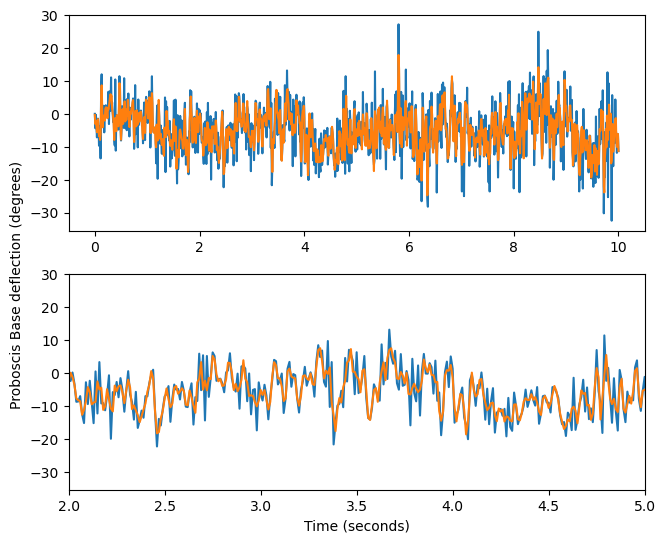

In [31]:
f = 100
t = 1/100

time = np.arange(len(Err_polyfit))*t
fig = plt.figure()
ax = fig.add_axes([0.01, 0.55, 0.9, 0.45])
ax.plot(time,Err_polyfit['value']*180/np.pi)
ax.plot(time,Err_smooth*180/np.pi)

ax1 = fig.add_axes([0.01, 0.01, 0.9, 0.45])
ax1.plot(time,Err_polyfit['value']*180/np.pi)
ax1.plot(time,Err_smooth*180/np.pi)
ax1.set_xlim([2,5])

plt.xlabel('Time (seconds)')
plt.ylabel('Proboscis Base deflection (degrees)', y=0.95)

Text(0, 0.5, 'Proboscis Base deflection (degrees)')

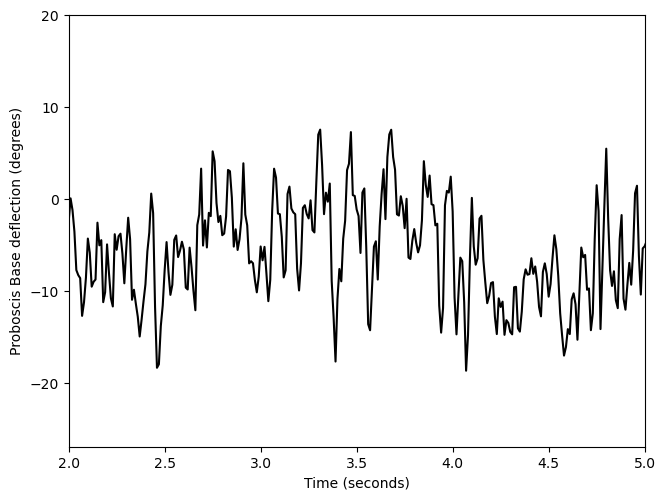

In [6]:
f = 100
t = 1/100

time = np.arange(len(Err_polyfit))*t
fig = plt.figure()
ax1 = fig.add_axes([0.01, 0.01, 0.9, 0.9])
# ax1.plot(time,Err_polyfit['value']*180/np.pi)
ax1.plot(time,Err_smooth*180/np.pi, color = 'k')
ax1.set_xlim([2,5])

plt.xlabel('Time (seconds)')
plt.ylabel('Proboscis Base deflection (degrees)')

In [32]:
## fft

from scipy.fft import fft, fftfreq

# Number of sample points
N = len(Err_polyfit)
f = 100 #100fps
# sample spacing
T = N / f

# x = np.linspace(0.0, 1/f, N/f, endpoint=False)
# y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

yf_polyfit = fft(Err_polyfit)
yf_smooth = fft(Err_smooth)
xf = fftfreq(N, d=1/f)[:N//2]

Text(0, 0.5, 'Power')

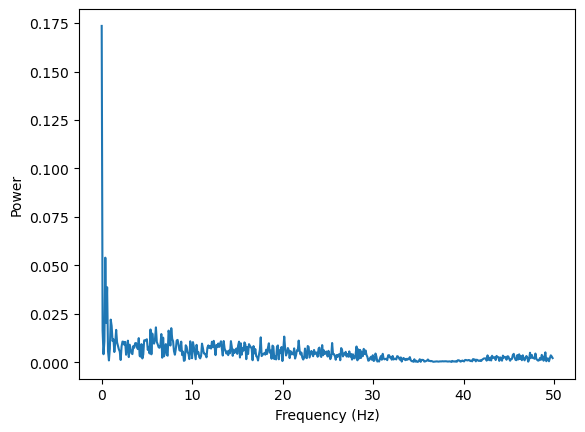

In [33]:
plt.plot(xf, 2.0/N * np.abs(yf_smooth[0:N//2]))
# plt.plot(xf, 2.0/N * np.abs(yf_polyfit[0:N//2]))
# plt.xlim([0.1, 50])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')

(0.0, 30.0)

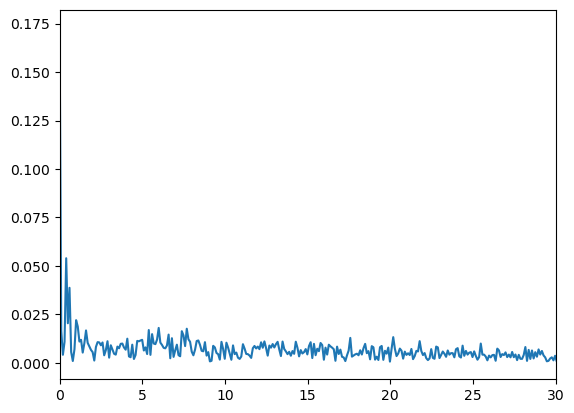

In [35]:
plt.plot(xf, 2.0/N * np.abs(yf_smooth[0:N//2]))
plt.xlim([0,30])

In [85]:
min(Err_polyfit['value']), max(Err_polyfit['value'])

(-0.5358729383329602, 0.5329109242338506)